**Brief Honor Code**. Do the homework on your own. You may discuss ideas with your classmates, but DO NOT copy the solutions from someone else or the Internet. If stuck, discuss with TA.

In [1]:
%matplotlib inline
import toolz.curried as c
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
import toolz as tz

**1**. (10 points)

Write a function `pdsist(xs)` which returns a matrix of the pairwise distance between the collection of vectors in `xs` using Euclidean distance.

Recall that Euclidean distance between two vectors $x$ and $y$ is

$$
d(x, y) = \sqrt{\sum{(y-x)^2}}
$$ 

Find the square distance matrix for
```python
xs = np.array([[0.20981496, 0.54777461, 0.9398527 ],
       [0.63149939, 0.935947  , 0.29834026],
       [0.46302941, 0.25515557, 0.0698739 ],
       [0.38192644, 0.42378508, 0.26055664],
       [0.46307302, 0.05943961, 0.60204931]])
```

Do this **without** using any for loops.

In [2]:
xs = np.array([[0.20981496, 0.54777461, 0.9398527 ],
       [0.63149939, 0.935947  , 0.29834026],
       [0.46302941, 0.25515557, 0.0698739 ],
       [0.38192644, 0.42378508, 0.26055664],
       [0.46307302, 0.05943961, 0.60204931]])
y = xs[:, :, None] - xs[:, :, None].T
y.shape

(5, 3, 5)

In [3]:
x = np.array([0,3,5,7,11,25]).reshape(2,3)
x.T

array([[ 0,  7],
       [ 3, 11],
       [ 5, 25]])

In [4]:
x[:, :, None]

array([[[ 0],
        [ 3],
        [ 5]],

       [[ 7],
        [11],
        [25]]])

In [5]:
x[:, :, None].T

array([[[ 0,  7],
        [ 3, 11],
        [ 5, 25]]])

In [6]:
(x[:, :, None] - x[:, :, None].T)

array([[[  0,  -7],
        [  0,  -8],
        [  0, -20]],

       [[  7,   0],
        [  8,   0],
        [ 20,   0]]])

In [7]:
xs

array([[ 0.20981496,  0.54777461,  0.9398527 ],
       [ 0.63149939,  0.935947  ,  0.29834026],
       [ 0.46302941,  0.25515557,  0.0698739 ],
       [ 0.38192644,  0.42378508,  0.26055664],
       [ 0.46307302,  0.05943961,  0.60204931]])

In [8]:
(xs[:, :, None])

array([[[ 0.20981496],
        [ 0.54777461],
        [ 0.9398527 ]],

       [[ 0.63149939],
        [ 0.935947  ],
        [ 0.29834026]],

       [[ 0.46302941],
        [ 0.25515557],
        [ 0.0698739 ]],

       [[ 0.38192644],
        [ 0.42378508],
        [ 0.26055664]],

       [[ 0.46307302],
        [ 0.05943961],
        [ 0.60204931]]])

In [9]:
xs[:, :, None].T

array([[[ 0.20981496,  0.63149939,  0.46302941,  0.38192644,  0.46307302],
        [ 0.54777461,  0.935947  ,  0.25515557,  0.42378508,  0.05943961],
        [ 0.9398527 ,  0.29834026,  0.0698739 ,  0.26055664,  0.60204931]]])

In [10]:
(y**2).sum(2)

array([[ 0.33569732,  0.49014818,  1.74395559],
       [ 0.29685399,  1.64472981,  0.55740188],
       [ 0.09907739,  0.61584352,  1.12863056],
       [ 0.10507148,  0.43886677,  0.61584789],
       [ 0.09909186,  1.17778864,  0.60617823]])

In [11]:
y

array([[[  0.00000000e+00,  -4.21684430e-01,  -2.53214450e-01,
          -1.72111480e-01,  -2.53258060e-01],
        [  0.00000000e+00,  -3.88172390e-01,   2.92619040e-01,
           1.23989530e-01,   4.88335000e-01],
        [  0.00000000e+00,   6.41512440e-01,   8.69978800e-01,
           6.79296060e-01,   3.37803390e-01]],

       [[  4.21684430e-01,   0.00000000e+00,   1.68469980e-01,
           2.49572950e-01,   1.68426370e-01],
        [  3.88172390e-01,   0.00000000e+00,   6.80791430e-01,
           5.12161920e-01,   8.76507390e-01],
        [ -6.41512440e-01,   0.00000000e+00,   2.28466360e-01,
           3.77836200e-02,  -3.03709050e-01]],

       [[  2.53214450e-01,  -1.68469980e-01,   0.00000000e+00,
           8.11029700e-02,  -4.36100000e-05],
        [ -2.92619040e-01,  -6.80791430e-01,   0.00000000e+00,
          -1.68629510e-01,   1.95715960e-01],
        [ -8.69978800e-01,  -2.28466360e-01,   0.00000000e+00,
          -1.90682740e-01,  -5.32175410e-01]],

       [[  1.

In [12]:
x.sum(axis = -1)

array([ 8, 43])

In [13]:
x

array([[ 0,  3,  5],
       [ 7, 11, 25]])

In [14]:
xs = np.array([[0.20981496, 0.54777461, 0.9398527 ],
       [0.63149939, 0.935947  , 0.29834026],
       [0.46302941, 0.25515557, 0.0698739 ],
       [0.38192644, 0.42378508, 0.26055664],
       [0.46307302, 0.05943961, 0.60204931]])


In [15]:
def pdsist(xs):
    '''
    calculate the distance matrix
    '''
    df= xs[:, :, None] - xs[:, :, None].T
    sq = df **2
    sm = sq.sum(1)
    ans = np.sqrt(sm)
    return ans

In [16]:
pdsist(xs)

array([[ 0.        ,  0.86025216,  0.9521589 ,  0.71164521,  0.64553997],
       [ 0.86025216,  0.        ,  0.73760151,  0.57098519,  0.9428    ],
       [ 0.9521589 ,  0.73760151,  0.        ,  0.26715821,  0.56702329],
       [ 0.71164521,  0.57098519,  0.26715821,  0.        ,  0.50591465],
       [ 0.64553997,  0.9428    ,  0.56702329,  0.50591465,  0.        ]])

**2**. (20 points)

Wikipedia gives this algorithm for finding prime numbers

To find all the prime numbers less than or equal to a given integer n by Eratosthenes' method:

- Create a list of consecutive integers from 2 through n: (2, 3, 4, ..., n).
- Initially, let p equal 2, the smallest prime number.
- Enumerate the multiples of p by counting to n from 2p in increments of p, and mark them in the list (these will be 2p, 3p, 4p, ...; the p itself should not be marked).
- Find the first number greater than p in the list that is not marked. If there was no such number, stop. Otherwise, let p now equal this new number (which is the next prime), and repeat from step 3.
- When the algorithm terminates, the numbers remaining not marked in the list are all the primes below n.

Find all primes less than 1,000 using this method.

- You may use `numpy` and do not have to follow the algorithm exactly if you can achieve the same results.

In [17]:
a = range(2,1000)
b = []
c = a

while(c[0] < np.sqrt(1000)):
    first = c[0]
    b += [first]
    c = [x for x in c if x%first !=0]

allprime = b+c

In [18]:
print(allprime)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


**3**. (20 points)

- Load the `iris` data set from R into a `pandas` DataFrame and create a new DataFrame `iris_scaled` where each feature (column) has zero mean and unit standard deviation (5)
- Calculate a pairwise distance matrix (using Euclidean distance) of the normalized features for each flower using the function you wrote in **1** (5)
- Using `seaborn`, plot a `clustermap` of the original `iris` data, with row color labels for the Species (5)
![clustermap](figs/iris_clustermap.png) 
- Using a single `seaborn` function, make a 2 by 2 grid of boxplots for each feature to compare across iris species. The y-axis scale need not be the same across subplots. (5)
![boxplots](figs/iris_boxplots.png)

In [19]:
%load_ext rpy2.ipython

In [20]:
%R -o iris

In [21]:
#from sklearn import preprocessing
#scaler = preprocessing.StandardScaler().fit(iris.iloc[:,0:4])
#firstpart = scaler.transform(iris.iloc[:,0:4])    
firstpart = (iris.iloc[:,:4]- iris.mean(axis=0)) / iris.std(axis=0)
iris_scaled = pd.concat([pd.DataFrame(firstpart).reset_index(drop = True), 
                         iris.iloc[:,4].reset_index(drop = True)], axis = 1)
iris_scaled.columns = iris.columns

In [22]:
iris_scaled.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,-0.897674,1.015602,-1.335752,-1.311052,setosa
1,-1.139200,-0.131539,-1.335752,-1.311052,setosa
2,-1.380727,0.327318,-1.392399,-1.311052,setosa
3,-1.501490,0.097889,-1.279104,-1.311052,setosa
4,-1.018437,1.245030,-1.335752,-1.311052,setosa


In [23]:
xst = np.array(iris_scaled.iloc[:,:4])

In [24]:
print(pdsist(xst))

[[ 0.          1.1722914   0.84278401 ...,  3.79270577  3.81338223
   3.32392896]
 [ 1.1722914   0.          0.52162552 ...,  3.73412795  4.00393113
   3.20274689]
 [ 0.84278401  0.52162552  0.         ...,  3.92339738  4.05911739
   3.36904951]
 ..., 
 [ 3.79270577  3.73412795  3.92339738 ...,  0.          1.06826493
   0.77270365]
 [ 3.81338223  4.00393113  4.05911739 ...,  1.06826493  0.          1.19692065]
 [ 3.32392896  3.20274689  3.36904951 ...,  0.77270365  1.19692065  0.        ]]


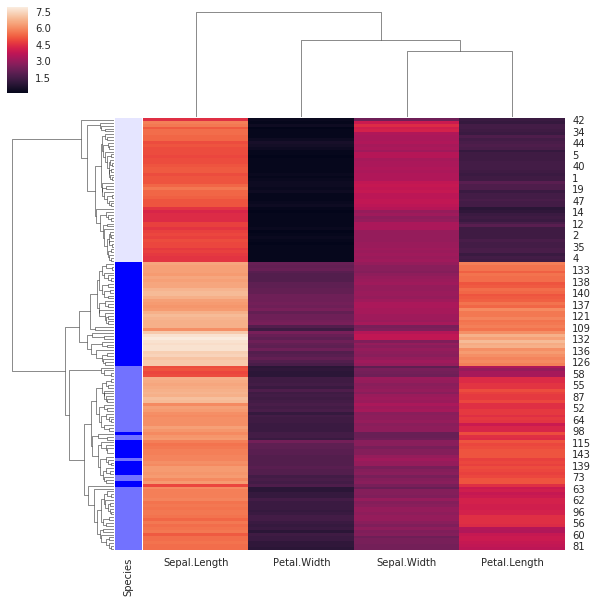

In [25]:
%R -o iris
import seaborn as sns 
sns.set(color_codes = True)
species = iris.pop('Species')
species_pal = sns.light_palette('blue', len(species.unique()))

lut = dict(zip(species.unique(), species_pal))
row_colors = species.map(lut)
g = sns.clustermap(iris, row_colors = row_colors)

In [26]:
%R -o iris
#df = pd.DataFrame(iris).reset_index(drop = False)
df = pd.melt(iris, id_vars= [ "Species"])

In [27]:
df.head()

,Species,variable,value
0,setosa,Sepal.Length,5.1
1,setosa,Sepal.Length,4.9
2,setosa,Sepal.Length,4.7
3,setosa,Sepal.Length,4.6
4,setosa,Sepal.Length,5.0


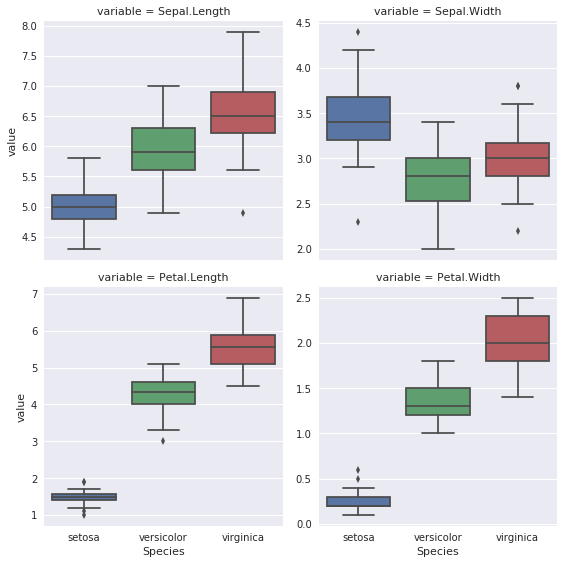

In [28]:
g = sns.factorplot(x= "Species", y = "value", col = "variable", data= df, kind = "box", col_wrap = 2, sharey = False)

. (50 points)

This is an example of the messiness of real-life data munging, using a (truncated and randomized) data set provided by an HIV researcher. In this data set, HIV-positive subjects were tested for sexually transmitted infections (STI) at each visit (and treated if they were positive).

You will probably need to review the pandas documentation and examples carefully to complete this exercise.

The file 'hiv.csv' contains data the HIV subjects. The variables are

PID: A randomly generated patient ID
Race: The race of the subject as a single letter code
Age: The age of the subject at study entry
Visit Date: Date of visit at which STI data was collected
STIs: Type of STI detected if any
The Race and Age of each subject are only recorded for the first visit.

Objectives:

Read the data set into a pandas DataFrame (5)
Fill up the missing Race and Age values (5)
Reclassify the STIs into one of the following categories ('none', 'syphilis', 'chlamydia', 'gonorrhea', 'HCV', NaN) by grouping in the obvious way. Note that 'none' means no infection and NaN (np.nan) means missing data. (10)
FInd the subject(s) with the most number of visits (how many are there?) (5)
Perform a chi-square test to see if an STI at the first visit is associated with the risk of an STI at any subsequent visit. You only need to do this for subjects who have more than 1 visit. You can use from scipy.stats import chi2_contingency to do the $\chi^2$ test. (20)

In [29]:
df5 = pd.read_csv("data/hiv.csv", index_col = 0)

In [30]:
df5[["Race", "Age"]]=df5[["Race", "Age"]].fillna(method = "ffill")

In [31]:
def tran(x):
    '''
    transform variable/clean string formate
    '''
    if x is np.nan:
        return x
    elif "-" in x:
        return x[:x.find('-')]
    elif x == "HCV":
        return x
    else:
        return x.lower()



df5['STIs']=df5['STIs'].apply(tran)

In [32]:
dict1 = tz.pipe(
    df5.iloc[:,0],
    tz.frequencies
)

In [33]:
freqvist = sorted(dict1, key=dict1.get, reverse = True)
print(freqvist[0])

9963


In [ ]:
dict1[9963]

The patient with ID 9963 visit the most, at the total of 16 times.

In [ ]:
result = df5.sort_values(by=['Visit Date'])
result["type"] = True
result.loc[result.STIs.isin([np.nan, "none"]), "type"] = False

In [ ]:
def countnum(pid):
    '''
    classify each patient into four categories
    '''
    global a,b,c,d
    df6 = result
    dt = df6[df6.PID== pid]
    if dt["type"].iloc[0]:
        if dt["type"].iloc[1:].any():
            a +=1
        else:
            b +=1
    else:
        if dt["type"].iloc[1:].any():
            c +=1
        else:
            d +=1

In [ ]:
uniqueid = pd.Series(list(set([k for (k,v) in dict1.items() if v > 1])))

In [ ]:
a = b =c =d = 0
uniqueid.apply(countnum)
a,b,c,d

a :STI in V1 and STI in V2:VN 

b :STI in V1 and no STI in V2:N

c :No STI in V1 and STI in V2:N

d :No STI in V1 and No STI in V2:N